In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
########## Decision tree on company Data #############
company=pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
label_encoder = preprocessing.LabelEncoder()
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])

In [5]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [8]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [10]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [12]:
company.loc[company['Sales'] <=9.50,'<=9.50'] ='low'
company.loc[company['Sales'] >9.50,'>9'] ='High'

In [13]:
del company['Sales']

In [14]:
del company['<=9.50']

In [15]:
company.head(10)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,>9
0,138,73,11,276,120,0,42,17,1,1,NaN
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,NaN
4,141,64,3,340,128,0,38,13,1,0,NaN
5,124,113,13,501,72,0,78,16,0,1,High
6,115,105,0,45,108,2,71,15,1,0,NaN
7,136,81,15,425,120,1,67,10,1,1,High
8,132,110,0,108,124,2,76,10,0,0,NaN
9,132,113,0,131,124,2,76,17,0,1,NaN


In [16]:
company.fillna(value=0,axis=0,inplace=True)

In [17]:
company.head(10)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,>9
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0
5,124,113,13,501,72,0,78,16,0,1,High
6,115,105,0,45,108,2,71,15,1,0,0
7,136,81,15,425,120,1,67,10,1,1,High
8,132,110,0,108,124,2,76,10,0,0,0
9,132,113,0,131,124,2,76,17,0,1,0


In [18]:
company['Sales']=pd.get_dummies(company['>9'],drop_first=True)

In [19]:
company.head(10)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,>9,Sales
0,138,73,11,276,120,0,42,17,1,1,0,0
1,111,48,16,260,83,1,65,10,1,1,High,1
2,113,35,10,269,80,2,59,12,1,1,High,1
3,117,100,4,466,97,2,55,14,1,1,0,0
4,141,64,3,340,128,0,38,13,1,0,0,0
5,124,113,13,501,72,0,78,16,0,1,High,1
6,115,105,0,45,108,2,71,15,1,0,0,0
7,136,81,15,425,120,1,67,10,1,1,High,1
8,132,110,0,108,124,2,76,10,0,0,0,0
9,132,113,0,131,124,2,76,17,0,1,0,0


In [20]:
########Now we have to preprocess our scaler data##########
from sklearn.preprocessing import StandardScaler
scaled_x=StandardScaler()
x_scale=scaled_x.fit_transform(company.iloc[:,:-2])

In [21]:
x=company.iloc[:,:-2]
y=company.iloc[:,-1]

In [22]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [23]:
y

0      0
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: uint8

In [24]:
colnames = list(company.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 '>9',
 'Sales']

In [25]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [30]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train) 

DecisionTreeRegressor()

In [31]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

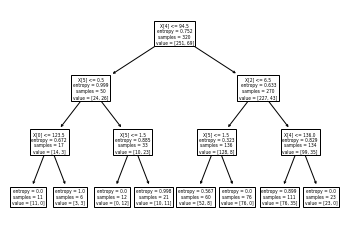

In [32]:
tree.plot_tree(model);

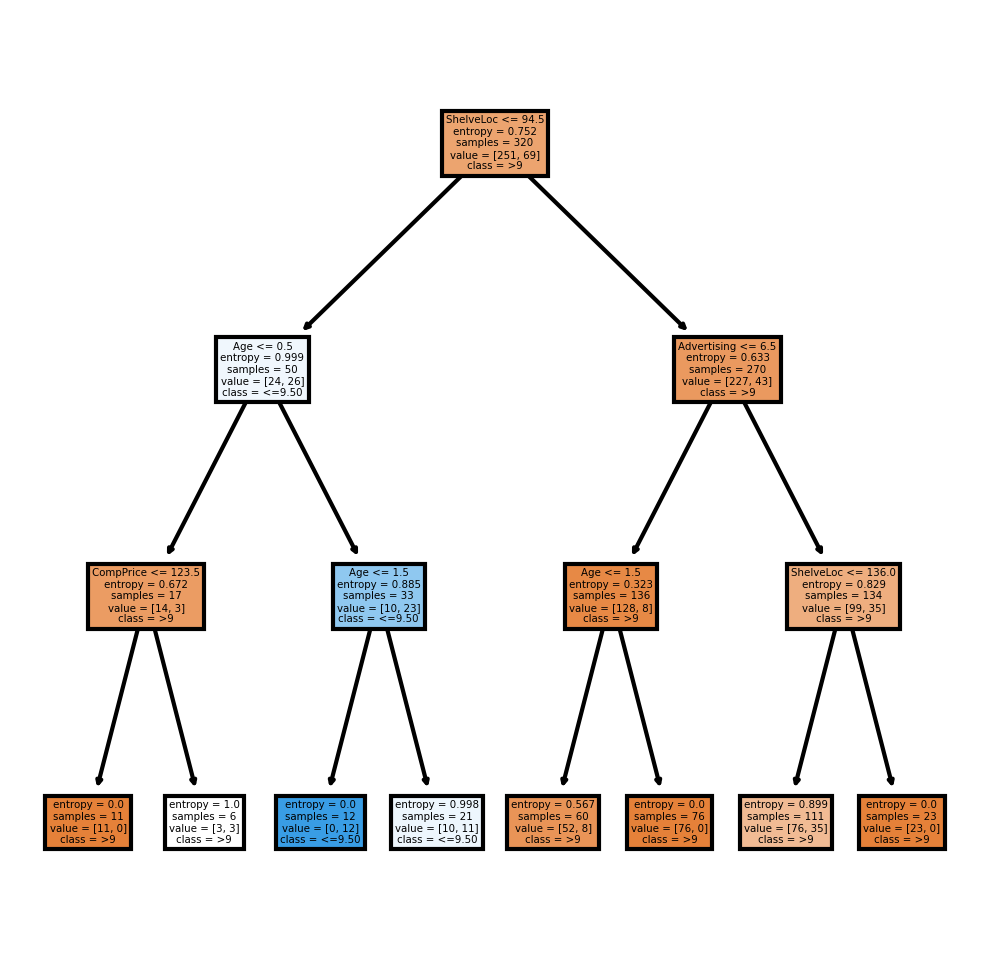

In [33]:
fn=['CompPrice','Income','Advertising','Population','ShelveLoc','Age','Education','Urban','Us']
cn=['>9','<=9.50']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [34]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

0    62
1    18
dtype: int64

In [35]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [36]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales,,
0,54,8
1,8,10


In [37]:
np.mean(preds==y_test)

0.8

In [38]:
############### using cart algorithm ###############
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [39]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.8

In [41]:
########################### Decision Tree Based Model on Fraud dataset#########################
fraudcheck=pd.read_csv('Fraud_check.csv')
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [42]:
label_encoder = preprocessing.LabelEncoder()
fraudcheck['Undergrad']= label_encoder.fit_transform(fraudcheck['Undergrad']) 
fraudcheck['Marital.Status']=label_encoder.fit_transform(fraudcheck['Marital.Status'])
fraudcheck['Urban']=label_encoder.fit_transform(fraudcheck['Urban'])

In [43]:
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [44]:
company.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
>9             0
Sales          0
dtype: int64

In [45]:
company.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc       int32
Age             int64
Education       int64
Urban           int32
US              int32
>9             object
Sales           uint8
dtype: object

In [46]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    int32 
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    int32 
 9   US           400 non-null    int32 
 10  >9           400 non-null    object
 11  Sales        400 non-null    uint8 
dtypes: int32(3), int64(7), object(1), uint8(1)
memory usage: 30.2+ KB


In [47]:
company.describe

<bound method NDFrame.describe of      CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US    >9  Sales  
0           17      1   1     0     

In [48]:
fraudcheck.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

In [49]:
fraudcheck.shape

(600, 6)

In [50]:
fraudcheck.loc[fraudcheck['Taxable.Income']<=30000,'<=30000']='Risky'
fraudcheck.loc[fraudcheck['Taxable.Income']>30000,'>30000']='Good'

In [52]:
fraudcheck.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,<=30000,>30000
0,0,2,68833,50047,10,1,NaN,Good
1,1,0,33700,134075,18,1,NaN,Good
2,0,1,36925,160205,30,1,NaN,Good
3,1,2,50190,193264,15,1,NaN,Good
4,0,1,81002,27533,28,0,NaN,Good
5,0,0,33329,116382,0,0,NaN,Good
6,0,0,83357,80890,8,1,NaN,Good
7,1,2,62774,131253,3,1,NaN,Good
8,0,2,83519,102481,12,1,NaN,Good
9,1,0,98152,155482,4,1,NaN,Good


In [53]:
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,<=30000,>30000
0,0,2,68833,50047,10,1,NaN,Good
1,1,0,33700,134075,18,1,NaN,Good
2,0,1,36925,160205,30,1,NaN,Good
3,1,2,50190,193264,15,1,NaN,Good
4,0,1,81002,27533,28,0,NaN,Good
...,...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,NaN,Good
596,1,0,69967,55369,2,1,NaN,Good
597,0,0,47334,154058,0,1,NaN,Good
598,1,1,98592,180083,17,0,NaN,Good


In [54]:
fraudcheck['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [55]:
fraudcheck.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


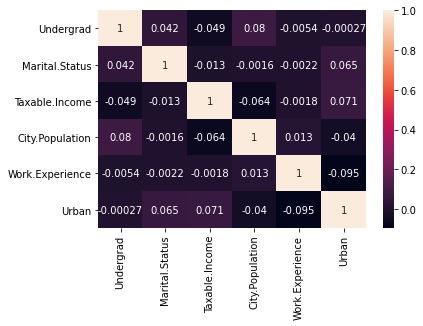

In [56]:
import seaborn as sns
sns.heatmap(fraudcheck.corr(),annot=True)

In [57]:
del fraudcheck['Taxable.Income']

In [58]:
del fraudcheck['<=30000']

In [59]:
fraudcheck

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,>30000
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [60]:
fraudcheck.fillna(value=0,axis=0,inplace=True)

In [61]:
fraudcheck.head(50)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,>30000
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
5,0,0,116382,0,0,Good
6,0,0,80890,8,1,Good
7,1,2,131253,3,1,Good
8,0,2,102481,12,1,Good
9,1,0,155482,4,1,Good


In [62]:
fraudcheck['Tax.Income']=pd.get_dummies(fraudcheck['>30000'],drop_first=True)

In [63]:
fraudcheck

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,>30000,Tax.Income
0,0,2,50047,10,1,Good,1
1,1,0,134075,18,1,Good,1
2,0,1,160205,30,1,Good,1
3,1,2,193264,15,1,Good,1
4,0,1,27533,28,0,Good,1
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,Good,1
596,1,0,55369,2,1,Good,1
597,0,0,154058,0,1,Good,1
598,1,1,180083,17,0,Good,1


In [64]:
fraudcheck.shape

(600, 7)

In [65]:
from sklearn.preprocessing import StandardScaler
scaled_x=StandardScaler()
x_scale=scaled_x.fit_transform(company.iloc[:,:-2])

In [66]:
x=fraudcheck.iloc[:,:-2]
y=fraudcheck.iloc[:,-1]

In [67]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [68]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Tax.Income, Length: 600, dtype: uint8

In [69]:
colnames = list(fraudcheck.columns)
colnames

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 '>30000',
 'Tax.Income']

In [70]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [71]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train) 

DecisionTreeRegressor()

In [72]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

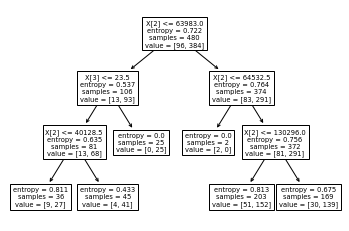

In [73]:
tree.plot_tree(model);

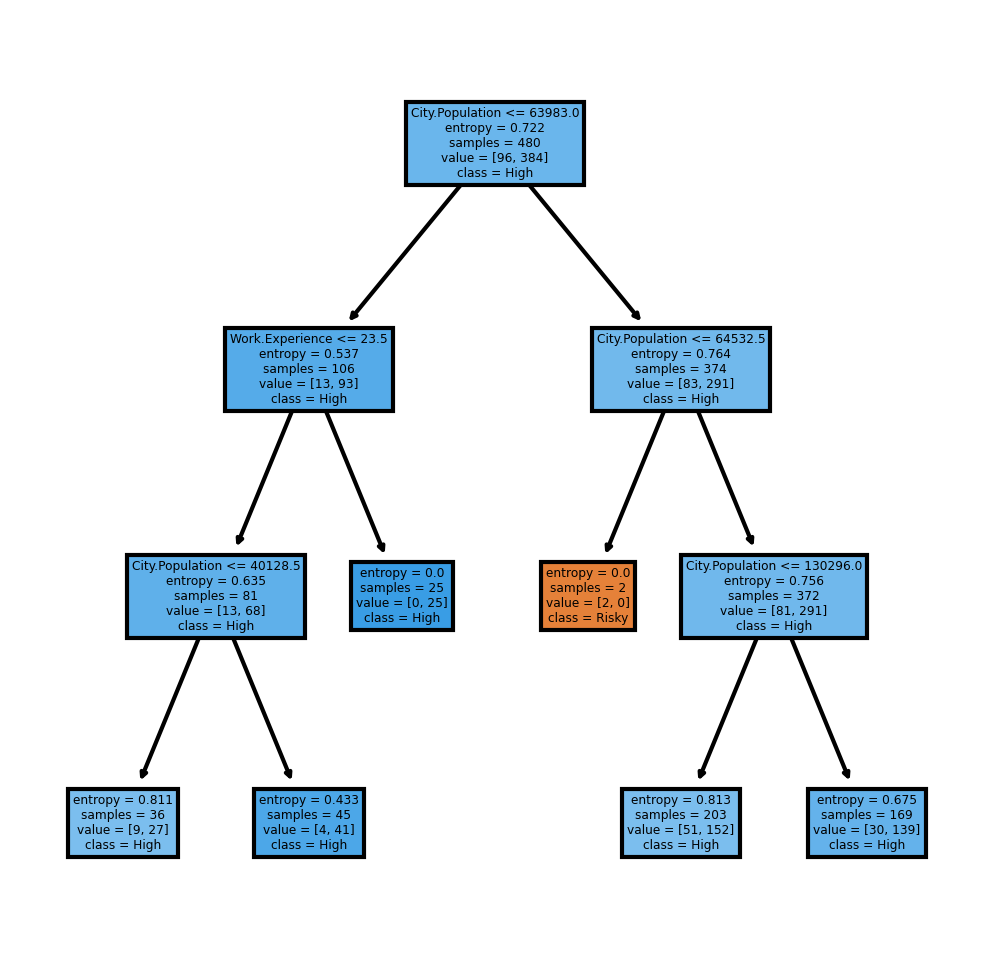

In [74]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);